# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from statsmodels.stats.weightstats import ztest, ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [2]:
# Run this code:

salaries = pd.read_csv('../../Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
# Your code here:
e=0
for i in salaries.isnull().sum():
    print ('La columna',salaries.columns[e],'tiene', round(i/len(salaries)*100,2),'% de valores nulos.')
    e+=1

La columna Name tiene 0.0 % de valores nulos.
La columna Job Titles tiene 0.0 % de valores nulos.
La columna Department tiene 0.0 % de valores nulos.
La columna Full or Part-Time tiene 0.0 % de valores nulos.
La columna Salary or Hourly tiene 0.0 % de valores nulos.
La columna Typical Hours tiene 75.82 % de valores nulos.
La columna Annual Salary tiene 24.18 % de valores nulos.
La columna Hourly Rate tiene 75.82 % de valores nulos.


Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64


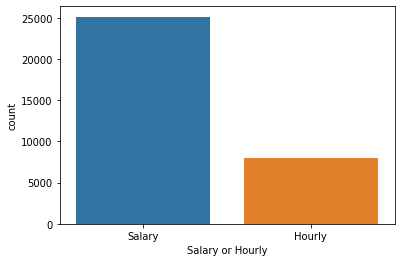

In [5]:
# Your code here:
print(salaries['Salary or Hourly'].value_counts())
_=sns.countplot(salaries['Salary or Hourly'])

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             16
BOARD OF

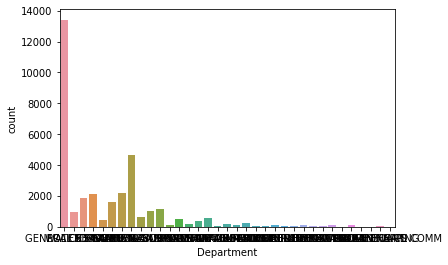

In [6]:
# Your code here:
print(salaries['Department'].value_counts())
_=sns.countplot(salaries['Department'])

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [7]:
"""

***************Test de hipótesis****************

Planteamiento:

Comprobaremos si la media de 30$/hr de los casos 
en que cobran por hora es significativamente dife-
rente.

H0 != 30$/h
H1 == 30$/h

Nivel de confianza del 95% que aplicaremos en
nuestra función 'hipotesis_result'

Usaremos la función 'ztest' de la librería 
statsmodels.
Se trata de una prueba sobre la media basada en 
una distribución normal.
Usaremos los siguientes parámetros:

* x1 : permite hasta dos muestras independientes,
solo el 1ro es obligatorio.
* value : En el caso de una única muestra, será
la media de la H0, en el caso de dos,
la diferencia según la H0.

************************************************


"""

"\n\n***************Test de hipótesis****************\n\nPlanteamiento:\n\nComprobaremos si la media de 30$/hr de los casos \nen que cobran por hora es significativamente dife-\nrente.\n\nH0 != 30$/h\nH1 == 30$/h\n\nNivel de confianza del 95% que aplicaremos en\nnuestra función 'hipotesis_result'\n\nUsaremos la función 'ztest' de la librería \nstatsmodels.\nSe trata de una prueba sobre la media basada en \nuna distribución normal.\nUsaremos los siguientes parámetros:\n\n* x1 : permite hasta dos muestras independientes,\nsolo el 1ro es obligatorio.\n* value : En el caso de una única muestra, será\nla media de la H0, en el caso de dos,\nla diferencia según la H0.\n\n************************************************\n\n\n"

In [8]:
#Nos quedamos con los datos que nos interesan
eur_hour = salaries[salaries['Salary or Hourly']=="Hourly"]["Hourly Rate"]

#Pasamos el ztest con los parámetros que necesitamos
r_ztest = ztest(eur_hour, value = 30)

In [9]:
#Separamos los resultados para poder usar la función
stat = r_ztest[0]
pval = r_ztest[1]

In [10]:
def hipotesis_result (pval, conf):
    
    """
    *************Contraste de hipótesis*************
    
    Devuelve la decisión de rechazar o no la hipótesis
    nula dados el p-valor y el nivel de confianza.
    
    Input:
    * pval(float): P-valor. Probabilidad de que un valor 
    sea posible dada una hipótesis nula cierta.
    * conf(float) : Nivel de confianza deseado.
    
    Output:
    * (str): Si se acepta o rechaza la H0 y los valores
    'pval' y 'conf' introducidos.
    
    ************************************************
    
    """
    alpha = 1 - conf
    if pval <= alpha:
        return f'Se rechaza la hipótesis nula (H0). Nuestro p-valor {pval} es menor a nuestra α {round(alpha,2)}'
    else:
        return f'No se rechaza la hipótesis nula (H0). Nuestro p-valor {pval} es mayor a nuestra α {round(alpha,2)}'

In [11]:
#Pasamos la función de resultado
hipotesis_result(pval, 0.95)

'Se rechaza la hipótesis nula (H0). Nuestro p-valor 1.8228873859286195e-94 es menor a nuestra alpha 0.05'

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [12]:
"""

***************Test de hipótesis****************

Planteamiento:

Comprobaremos si los salarios de los policias de
este año son más altos que la media del año pasado

H0 media salarios > 86000$/año
H1 media salarios == 86000$/año

Nivel de confianza del 95% que aplicaremos en
nuestra función 'hipotesis_result'

Usaremos la función 'ztest' de la librería 
statsmodels.
Se trata de una prueba sobre la media basada en 
una distribución normal.
Usaremos los siguientes parámetros:

* x1 : permite hasta dos muestras independientes,
solo el 1ro es obligatorio.
* value : En el caso de una única muestra, será
la media de la H0, en el caso de dos,
la diferencia según la H0.

************************************************


"""

"\n\n***************Test de hipótesis****************\n\nPlanteamiento:\n\nComprobaremos si los salarios de los policias de\neste año son más altos que la media del año pasado\n\nH0 media salarios > 86000$/año\nH1 media salarios == 86000$/año\n\nNivel de confianza del 95% que aplicaremos en\nnuestra función 'hipotesis_result'\n\nUsaremos la función 'ztest' de la librería \nstatsmodels.\nSe trata de una prueba sobre la media basada en \nuna distribución normal.\nUsaremos los siguientes parámetros:\n\n* x1 : permite hasta dos muestras independientes,\nsolo el 1ro es obligatorio.\n* value : En el caso de una única muestra, será\nla media de la H0, en el caso de dos,\nla diferencia según la H0.\n\n************************************************\n\n\n"

In [13]:
# Your code here:

#Nos quedamos con los datos que nos interesan
eur_year = salaries[salaries['Salary or Hourly']=="Salary"][salaries['Department']=="POLICE"]['Annual Salary']

#Pasamos el ztest con los parámetros que necesitamos
r_ztest = ztest(eur_year, value = 86000)

/Users/MarLizana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [14]:
#Separamos los resultados para poder usar la función
stat = r_ztest[0]
pval = r_ztest[1]

In [15]:
#Pasamos la función de resultado
hipotesis_result(pval, 0.95)

'Se rechaza la hipótesis nula (H0). Nuestro p-valor 0.002056169057509571 es menor a nuestra alpha 0.05'

Using the `crosstab` function, find the department that has the most hourly workers. 

In [16]:
# Your code here:
deps_hourly_workers = pd.crosstab(salaries['Department'], 
                                  salaries['Salary or Hourly'] == 'Hourly',
                                  values=salaries['Name'], 
                                  aggfunc = "count").sort_values(by = True, 
                                                                 ascending=False)
deps_hourly_workers.head()

Salary or Hourly,False,True
Department,,
STREETS & SAN,336.0,1862.0
WATER MGMNT,366.0,1513.0
OEMC,829.0,1273.0
AVIATION,547.0,1082.0
GENERAL SERVICES,215.0,765.0


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [17]:
"""

***************Test de hipótesis****************

Planteamiento:

Los trabajadores del departamento de STREETS & 
SAN dicen que su salario por hora es inferior a
35$

H0 salario/hora < 35$
H1 salario/hora ≥ 35$

Nivel de confianza del 95% que aplicaremos en
nuestra función 'hipotesis_result'

Usaremos la función 'ttest_1samp' de la librería 
scipy.stats.

La prueba 't de Student' se aplica cuando la pobla-
ción estudiada sigue una distribución normal pero 
el tamaño muestral es demasiado pequeño como para 
que el estadístico en el que está basada la inferen-
cia esté normalmente distribuido, utilizándose una 
estimación de la desviación típica en lugar del 
valor real. Es utilizado en análisis discriminante.

Usaremos los siguientes parámetros:

* a : muestra de la observación
* popmean : valor esperado en la H0.

************************************************


"""

"\n\n***************Test de hipótesis****************\n\nPlanteamiento:\n\nLos trabajadores del departamento de STREETS & \nSAN dicen que su salario por hora es inferior a\n35$\n\nH0 salario/hora < 35$\nH1 salario/hora ≥ 35$\n\nNivel de confianza del 95% que aplicaremos en\nnuestra función 'hipotesis_result'\n\nUsaremos la función 'ttest_1samp' de la librería \nscipy.stats.\n\nLa prueba 't de Student' se aplica cuando la pobla-\nción estudiada sigue una distribución normal pero \nel tamaño muestral es demasiado pequeño como para \nque el estadístico en el que está basada la inferen-\ncia esté normalmente distribuido, utilizándose una \nestimación de la desviación típica en lugar del \nvalor real. Es utilizado en análisis discriminante.\n\nUsaremos los siguientes parámetros:\n\n* a : muestra de la observación\n* popmean : valor esperado en la H0.\n\n************************************************\n\n\n"

In [18]:
# Your code here:

#Nos quedamos con los datos que nos interesan
streets_san_hour = salaries[salaries['Salary or Hourly']=="Salary"][salaries['Department']=="STREETS & SAN"]['Annual Salary']

#Pasamos el ztest con los parámetros que necesitamos
stat, pval = sp.ttest_1samp(streets_san_hour, 35)

/Users/MarLizana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [19]:
hipotesis_result(pval, 0.95)

'Se rechaza la hipótesis nula (H0). Nuestro p-valor 4.600753636081316e-205 es menor a nuestra alpha 0.05'

# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [ ]:
"""

************Intervalos de confianza*************

Se llama intervalo de confianza a un rango en el
que se estima que se encontrará cierto valor des-
conocido con un determinado nivel de confianza.

Para ello es necesario conocer la distribución
teórica que sigue el parámetro a estimar, θ.



Nivel de confianza : 95%
Alpha : 0.05
Grados de libertad : n-1

Usaremos la función 't' de la librería Scipy con
el método 'interval'. Requiere los siguientes pa-
rámetros:

* alpha
* df
* loc = 0
* scale = 1

************************************************
"""

In [ ]:
# Your code here
a, b = sp.t.interval(0.05, eur_year)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [ ]:
# Your code here:

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [ ]:
"""

************* Test de proporciones *************

Contrastar un valor postulado para la proporción
de individuos de una població que verifican deter-
minada característica A. Tomar una muestra de ta-
maño n equivale a evaluar sobre cada una de las
n unidades muestrales el cumplimiendo o no de A.

Planteamiento:

El número de trabajadores por hora en la ciudad 
de Chicago es

H0: ==25%
H1: !=25%

Nivel de confianza del 95% que aplicaremos en
nuestra función 'hipotesis_result'

Usaremos la función 'proportions_ztest' de la 
librería statsmodels.
Se trata de una prueba sobre la media basada en 
una distribución normal.
Usaremos los siguientes parámetros:

* x1 : permite hasta dos muestras independientes,
solo el 1ro es obligatorio.
* value : En el caso de una única muestra, será
la media de la H0, en el caso de dos,
la diferencia según la H0.

************************************************

"""

In [20]:
# Your code here:

#Número de trabajadores por hora
num_hourly = salaries['Salary or Hourly'].value_counts()[1]

#Número totalde trabajadores
num_total = len(salaries['Salary or Hourly'])

#Valor para la hipótesis
value = 0.25

#Nivel de confianza
conf = 0.95

#Estadístico y p-valor del Z-Test
stat, pval = proportions_ztest(count=num_hourly, 
                               nobs=num_total, 
                               value=value)

In [21]:
hipotesis_result(pval, conf)

'Se rechaza la hipótesis nula (H0). Nuestro p-valor 0.0004481127249057967 es menor a nuestra alpha 0.05'